In [1]:
# Classification is a problem of predicting if something is one or another, 0 or 1, true or false... etc..

## Make classification data and get it ready

In [2]:
from sklearn.datasets import make_circles

In [3]:
# make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, #adds randomness
                    random_state=88) #same as setting a seed

len(X), len(y)

(1000, 1000)

In [4]:
print(f'Firs 5 samples of X:\n {X[:5]}\n')
print(f'Firs 5 samples of y:\n {y[:5]}')

Firs 5 samples of X:
 [[ 0.99479988  0.00199469]
 [ 0.79020191 -0.33914489]
 [ 0.60377406  0.55673116]
 [ 0.74729632  0.35150497]
 [-0.88736514 -0.27892634]]

Firs 5 samples of y:
 [0 1 1 1 0]


In [5]:
# Make DataFrame of cirlce data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y
                      })
circles.head(10)

,X1,X2,label
0,0.994800,0.001995,0
1,0.790202,-0.339145,1
2,0.603774,0.556731,1
3,0.747296,0.351505,1
4,-0.887365,-0.278926,0
5,0.753199,-0.327201,1
6,0.622256,0.434861,1
7,-0.405536,0.588440,1
8,-0.154911,-0.770803,1
9,0.507713,0.656800,1


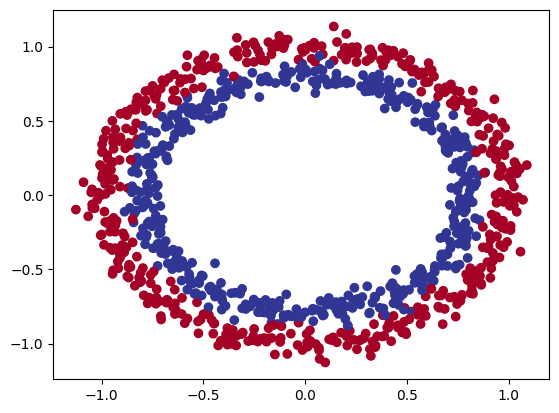

In [6]:
# Visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], #x axis
            y=X[:, 1], #y axis
            c=y, #color with y labels
            cmap=plt.cm.RdYlBu);

This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

https://scikit-learn.org/stable/datasets/toy_dataset.html

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape
# X has 2 features, y has none, its just a single num, a scalar
# so for now 2 features represent a label

((1000, 2), (1000,))

In [8]:
X, y

(array([[ 0.99479988,  0.00199469],
        [ 0.79020191, -0.33914489],
        [ 0.60377406,  0.55673116],
        ...,
        [ 0.80386331, -0.23982286],
        [-0.91120334, -0.39562495],
        [ 0.74554111, -0.2566711 ]]),
 array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 

In [9]:
# View a first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample}\nAnd the same for y: {y_sample}\n\n")
print(f"Shapes for one sample of X: {X_sample.shape}\nAnd the same for y: {y_sample.shape}")

Values for one sample of X: [0.99479988 0.00199469]
And the same for y: 0


Shapes for one sample of X: (2,)
And the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch

In [11]:
# turn data into tensors
type(X)

numpy.ndarray

In [12]:
# numpy float = float64, .type(torch.float) to turn it into float32
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X[:5], y[:5]

(tensor([[ 0.9948,  0.0020],
         [ 0.7902, -0.3391],
         [ 0.6038,  0.5567],
         [ 0.7473,  0.3515],
         [-0.8874, -0.2789]]),
 tensor([0., 1., 1., 1., 0.]))

In [14]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [15]:
# split data(randomly) into test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% test, 80%train
                                                    random_state=88
                                                    )

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)


## 2. Building a model

Lets build a model to classify our blue and red dots

We need:
1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
1. Constructing a model by subclassing nn.Module.
1. Defining a loss function and optimizer.
1. Creating a training loop (this'll be in the next section).

In [17]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=32) # takes in 2 features (from X(shape 800/200, 2)), produces 32 features
        self.layer_2 = nn.Linear(in_features=32, out_features=1) # takes in 32 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=1, bias=True)
)

In [20]:
device, next(model_0.parameters()).device

('cuda', device(type='cuda', index=0))

In [21]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.0065],
        [ 0.0860],
        [ 0.3802],
        [ 0.2383],
        [ 0.3468],
        [ 0.4340],
        [-0.0957],
        [ 0.1179],
        [-0.1523],
        [-0.0292]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 1., 0., 1., 0., 0., 0., 0., 0.])



### 2.1 Setup loss function and optimizer

In [23]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [24]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

## 3. Train model


### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [25]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0065],
        [0.0860],
        [0.3802],
        [0.2383],
        [0.3468]], device='cuda:0', grad_fn=<SliceBackward0>)

In [26]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5016],
        [0.5215],
        [0.5939],
        [0.5593],
        [0.5858]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [27]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [28]:
y_test[:5]

tensor([1., 1., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [29]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70150, Accuracy: 51.38% | Test loss: 0.69933, Test acc: 54.50%
Epoch: 10 | Loss: 0.69856, Accuracy: 49.88% | Test loss: 0.69623, Test acc: 56.00%
Epoch: 20 | Loss: 0.69692, Accuracy: 49.62% | Test loss: 0.69457, Test acc: 54.50%
Epoch: 30 | Loss: 0.69591, Accuracy: 49.50% | Test loss: 0.69364, Test acc: 53.00%
Epoch: 40 | Loss: 0.69523, Accuracy: 49.88% | Test loss: 0.69312, Test acc: 52.50%
Epoch: 50 | Loss: 0.69476, Accuracy: 49.88% | Test loss: 0.69283, Test acc: 52.50%
Epoch: 60 | Loss: 0.69441, Accuracy: 49.12% | Test loss: 0.69269, Test acc: 52.50%
Epoch: 70 | Loss: 0.69415, Accuracy: 49.38% | Test loss: 0.69263, Test acc: 53.00%
Epoch: 80 | Loss: 0.69394, Accuracy: 49.25% | Test loss: 0.69262, Test acc: 53.00%
Epoch: 90 | Loss: 0.69378, Accuracy: 49.62% | Test loss: 0.69265, Test acc: 52.50%


## 4. Make predictions and evaluate the model

In [30]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)